### Import Libraries

In [91]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Machine Learning
from sklearn.linear_model import LogisticRegression

### Import and Inspect Dataset

In [92]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [93]:
# preview training data
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Examine Training and Test Dataset

In [94]:
df_train.info()
print "------------------------------------------------"
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 

### Data Cleaning

#### Training Data
- Valid Age information for 714 out of 891 passengers 
- Valid Cabin information for 204 out of 891 passengers
- Valid Embarkation information for 889 out of 891 passengers

#### Test Data
- Valid Age information for 332 out of 418 passengers 
- Valid Cabin information for 91 out of 418 passengers
- Valied Fare Information for 417 out of 418 passengers

#### Actions
- Drop the cabin column as it contains little information. 
- Replace the missing embarkation in training data with the modal point.
- Replace the missing fare information in test data with the median value. 
- Cannot lose information for 177 passengers by removing those without age information. Investigate the age distribution to make informed replacement.

In [95]:
# drop the cabin column for the train and test dataset
df_train = df_train.drop(['Cabin'], axis = 1)
df_test = df_test.drop(['Cabin'], axis = 1)

# replace missing embarked value in training data
df_train["Embarked_Fill"] = np.where(pd.isnull(df_train["Embarked"]),
                                     "S", 
                                     df_train["Embarked"])

# replace missing fare information in test dataset
df_test["Fare_Fill"] = np.where(pd.isnull(df_test["Fare"]), 
                                df_test["Fare"].median(), 
                                df_test["Fare"])

In [96]:
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId      891 non-null int64
Survived         891 non-null int64
Pclass           891 non-null int64
Name             891 non-null object
Sex              891 non-null object
Age              714 non-null float64
SibSp            891 non-null int64
Parch            891 non-null int64
Ticket           891 non-null object
Fare             891 non-null float64
Embarked         889 non-null object
Embarked_Fill    891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare     

Investigate age distribution to make informed replacement decision

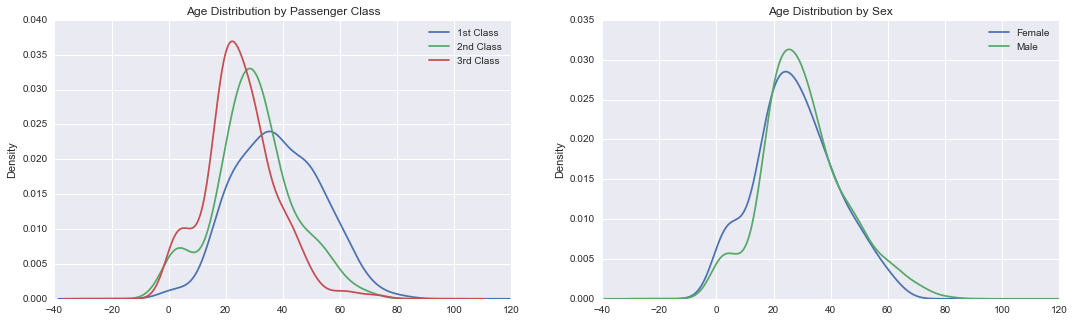

In [97]:
fig = plt.figure(figsize = (18,5))

# plot age distribution for different Pclass
plt.subplot2grid((1,2), (0,0))
df_train["Age"][df_train["Pclass"] == 1].plot(kind = "kde")
df_train["Age"][df_train["Pclass"] == 2].plot(kind = "kde")
df_train["Age"][df_train["Pclass"] == 3].plot(kind = "kde")

plt.title("Age Distribution by Passenger Class")
plt.legend(("1st Class", "2nd Class", "3rd Class"), loc = "best")

# plot age distribution for Males and Females
plt.subplot2grid((1,2), (0,1))
df_train["Age"][df_train["Sex"] == "female"].plot(kind = "kde")
df_train["Age"][df_train["Sex"] == "male"].plot(kind = "kde")

plt.title("Age Distribution by Sex")
plt.legend(("Female", "Male"), loc = "best")

Observations
- Significant difference in age between passengers of different classes. 
- Age distribution is slightly positively skewed, so use the median. 
- Replace missing age values with the median age of the passengers in that Pclass

In [98]:
def replace_age(grp):
    grp['Age_Fill'] = grp['Age'].median()
    return grp
                               
# group by passenger class and then by gender for both train and test datasets                       
df_train = df_train.groupby(['Pclass']).apply(replace_age)
df_test = df_test.groupby(["Pclass"]).apply(replace_age)
                               
# For those with real ages, discard the median value
df_train["Age_Fill"] = np.where(pd.isnull(df_train['Age']), df_train['Age_Fill'], df_train['Age'])
df_test["Age_Fill"] = np.where(pd.isnull(df_test["Age"]), df_test["Age_Fill"], df_test["Age"])

In [99]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Embarked_Fill,Age_Fill
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,S,35.0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,Q,24.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,S,54.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,S,2.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,S,27.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,C,14.0


In [100]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_Fill,Age_Fill
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,7.8292,34.5
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,7.0000,47.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,9.6875,62.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,8.6625,27.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,12.2875,22.0
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,S,9.2250,14.0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,Q,7.6292,30.0
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,S,29.0000,26.0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,C,7.2292,18.0
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,S,24.1500,21.0


### Let's visualise our data

Begin by plotting some distributions

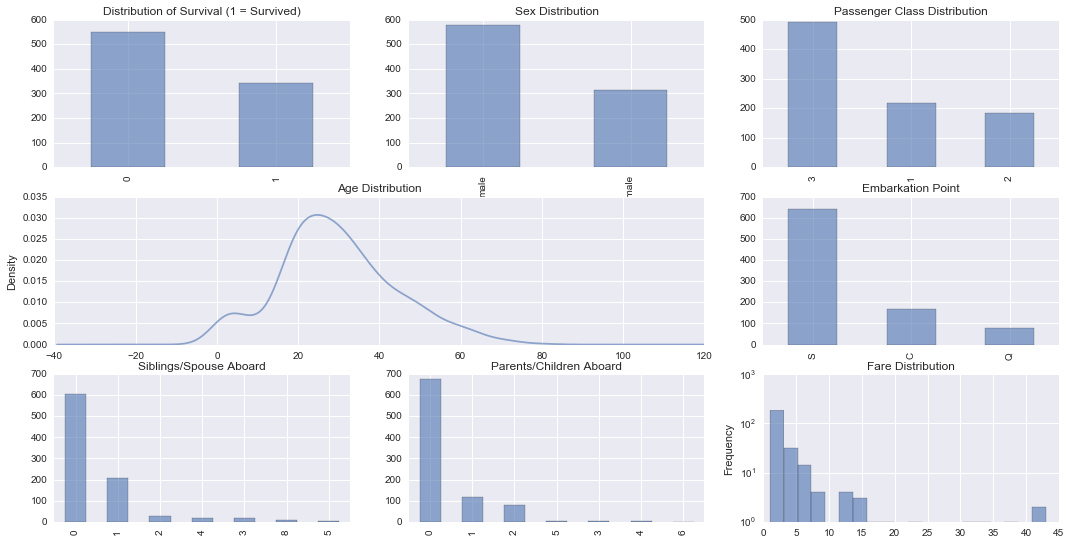

In [101]:
# define function to plot bar charts
def plot_bar(key, title):
    df_train[key].value_counts().plot(kind = 'bar', title = title, alpha = 0.6)

# set figure
fig = plt.figure(figsize = (18,9))

plt.subplot2grid((3,3), (0,0))
plot_bar("Survived", "Distribution of Survival (1 = Survived)")     
        
plt.subplot2grid((3,3), (0,1))
plot_bar("Sex", "Sex Distribution")

plt.subplot2grid((3,3), (0,2))
plot_bar("Pclass", "Passenger Class Distribution")

plt.subplot2grid((3,3), (1,0), colspan = 2)
df_train['Age'].plot(kind = 'kde', title = "Age Distribution", alpha = 0.6)

plt.subplot2grid((3,3), (1,2))
plot_bar("Embarked", "Embarkation Point")

plt.subplot2grid((3,3), (2,0))
plot_bar("SibSp", "Siblings/Spouse Aboard")

plt.subplot2grid((3,3), (2,1))
plot_bar("Parch", "Parents/Children Aboard")

plt.subplot2grid((3,3), (2,2))
df_train['Fare'].value_counts().plot(kind = 'hist', title = "Fare Distribution", alpha = 0.6, bins = 20, logy = True)
# Note I've used a logarithmic scale for the y-axis


Observations
- The majority of the passengers perished in the shipwreck. 
- The passengers were predominantly men.
- Most passengers travelled in third class
- Most passengers were young
- Most passengers embarked at Southampton.
- The SibSp and Parch distributions show that most passengers travelled alone

So we have some understanding of our passengers. Now let's see which ones had a higher survival rate. 

Survival Rate for Female and Male Passengers


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

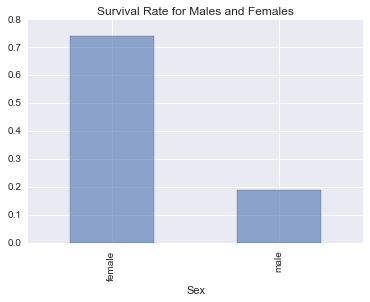

In [102]:
# plot survival rate for female and male passengers

df_train.groupby('Sex')['Survived'].mean().plot(kind = 'bar', 
                                                title = 'Survival Rate for Males and Females',
                                                alpha = 0.6) 

print "Survival Rate for Female and Male Passengers"
df_train.groupby('Sex')['Survived'].mean()

Observations

- Clearly, gender is a strong indicator of survival with female survival rates close to 4 times that for males. Let's use this as a starting point and investigate how other factors tie in. 

Survival Rate for Female Passengers in different Pclass
Pclass
1    0.968085
2    0.921053
3    0.500000
Name: Survived, dtype: float64
Survival Rate for Male Passengers in different Pclass
Pclass
1    0.368852
2    0.157407
3    0.135447
Name: Survived, dtype: float64


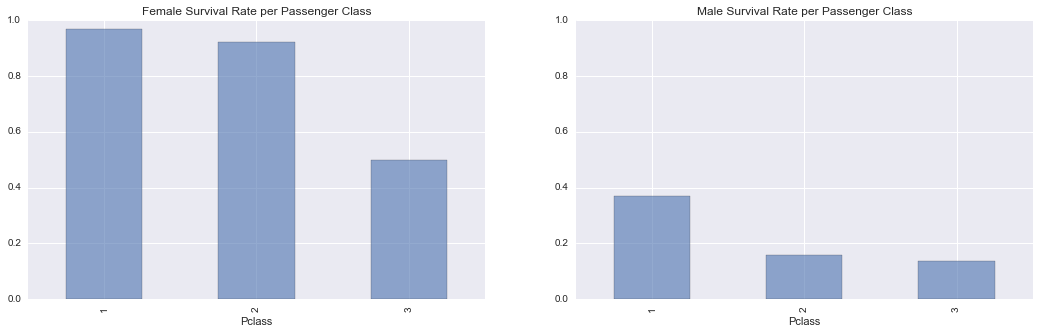

In [103]:
# plot survival rate for female and male passengers sorted by passenger class

fig = plt.figure(figsize = (18,5))

plt.subplot2grid((1,2), (0,0))
df_train[df_train["Sex"] == "female"].groupby("Pclass")["Survived"].mean().plot(kind = 'bar', 
                                                                title = 'Female Survival Rate per Passenger Class',
                                                                alpha = 0.6)

plt.subplot2grid((1,2), (0,1))
df_train[df_train["Sex"] == "male"].groupby("Pclass")["Survived"].mean().plot(kind = 'bar', 
                                                                title = 'Male Survival Rate per Passenger Class',
                                                                alpha = 0.6, ylim = [0,1])

print "Survival Rate for Female Passengers in different Pclass"
print df_train[df_train["Sex"] == "female"].groupby("Pclass")["Survived"].mean()
print "Survival Rate for Male Passengers in different Pclass"
print df_train[df_train["Sex"] == "male"].groupby("Pclass")["Survived"].mean()                                                  

Observations

- Within Gender, Pclass had a strong effect on survival rate. 
- Females in first and second class were very likely to survive with a survival rate of 0.97 and 0.92, respectively. 
- For males, it was only passengers in first class, who experienced a higher survival rate at 0.4, over double that of males in second and third class. 
- Females were clearly given priority; a female in third class had a higher survival rate than a male in first. 

In [104]:
# lets see whether fare had an effect on survival within the Pclass
# first create a new column called binned_fare

df_train["Fare_Binned"] = '>30' # set default value

df_train["Fare_Binned"].loc[(df_train["Fare"] > 20) & (df_train["Fare"] <= 30)] = '20<30'
df_train["Fare_Binned"].loc[(df_train["Fare"] > 10) & (df_train["Fare"] <= 20)] = '10<20'
df_train["Fare_Binned"].loc[(df_train["Fare"] > 0) & (df_train["Fare"] <= 10)] = '0<10'

# check dataframe
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Embarked_Fill,Age_Fill,Fare_Binned
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,S,22.0,0<10
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,38.0,>30
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,S,26.0,0<10
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,S,35.0,>30
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,S,35.0,0<10


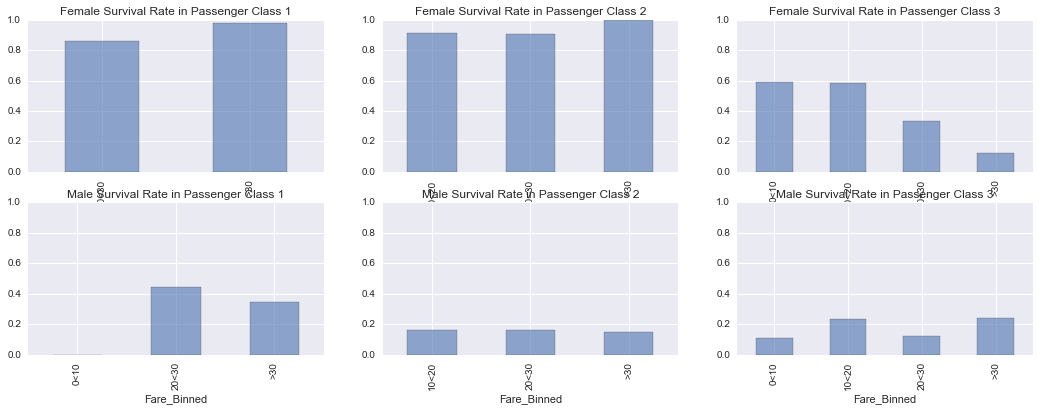

In [105]:
# Now let's plot Survival Rate for males and females in each passenger class sorted by the fare they paid

fig = plt.figure(figsize = (18,6))

# define function to plot charts below
def plot_sorted_chart(sex, p_class, grouping_key):
    df_train[(df_train["Sex"] == sex) & (df_train["Pclass"] == p_class)]\
    .groupby(grouping_key)["Survived"].mean()\
    .plot(kind = 'bar', 
          title = '{} Survival Rate in Passenger Class {}'.format(sex.capitalize(), p_class),
          alpha = 0.6, 
          sort_columns = True,
          ylim = [0,1])
    
        
for i in range(1, 4):
    plt.subplot2grid((2,3), (0, i-1))
    plot_sorted_chart("female", i, "Fare_Binned")
    
    plt.subplot2grid((2,3), (1, i-1))
    plot_sorted_chart("male", i, "Fare_Binned")           

Observations
- For females in first and second class, fare has some discriminatory value within class with respect to survival. Those who paid >30 had a higher survival rate. This relationship is not true for females in third class.
- For males, there is some correlation between survival rate and fare paid in second class but no relationship is observed elsewhere.
- Interestingly, there are passengers in third class who paid more than passengers in first!
- I will discard this variable. There is a relationship between Fare_Binned and survival for females but we already have strong discriminators for whether a female survived or not. We do not have that for males; if fare_binned had discriminated amongst males, I would have kept the variable. 

In [106]:
df_train = df_train.drop(["Fare_Binned"], axis = 1)

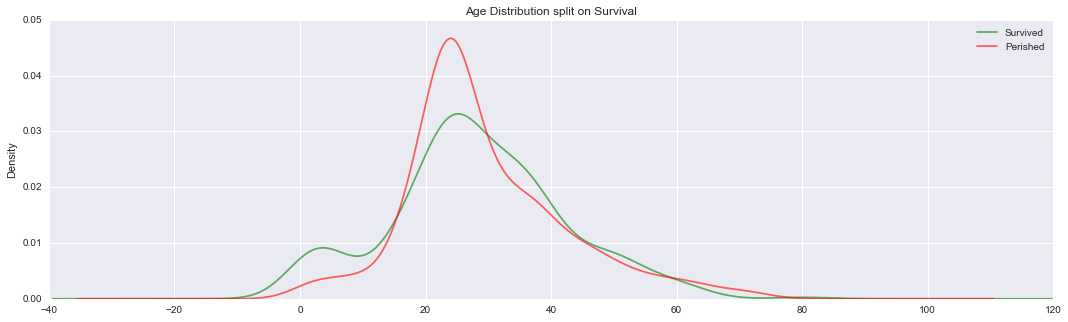

In [107]:
# Have investigated how Pclass, Fare and Gender affected survival rate
# Now want to see if age had an effect.
# Know that children were given priority so expect to see that in the data

fig = plt.figure(figsize = (18,5))

df_train['Age_Fill'][df_train['Survived'] == 1].plot(kind = 'kde', color = 'green', alpha = 0.6)
df_train['Age_Fill'][df_train['Survived'] == 0].plot(kind = 'kde', color = 'red', alpha = 0.6)

plt.title("Age Distribution split on Survival")
plt.legend(("Survived", "Perished"), loc = "best")

Observations 
- There is a clear bump showing an increased survival rate for children.
- Create a child variable to see if this has any discriminatory power for passengers between the ages of 0 and 15
- Create a young person variable for those between 15 and 30 to account for the discrepancy in survival rate for those between the ages of 15 and 20.

In [108]:
df_train["Age_Range"] = "Senior" # set default value
df_train["Age_Range"].loc[(df_train["Age_Fill"] < 30) & (df_train["Age"] >= 15)] = "Young"
df_train["Age_Range"].loc[(df_train["Age_Fill"] < 15) & (df_train["Age"] > 0)] = "Child"

df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Embarked_Fill,Age_Fill,Age_Range
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,S,S,27.0,Young
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,S,S,19.0,Young
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,S,S,24.0,Senior
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C,C,26.0,Young
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,Q,Q,32.0,Senior


Let's now see whether age_range has any discriminatory power once the data is sorted for gender and Pclass 

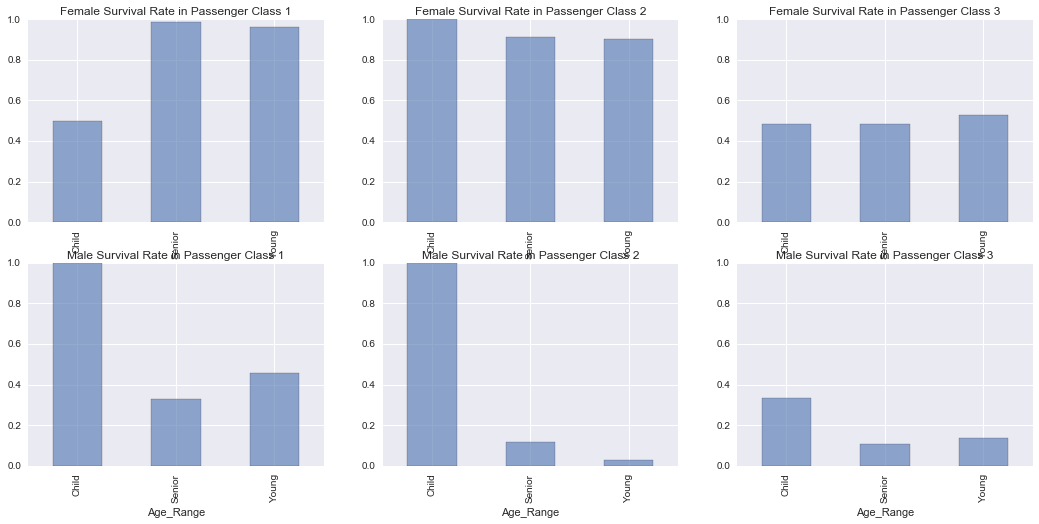

In [109]:
# use plot_sorted_chart function defined above to plot data

fig = plt.figure(figsize = (18,8))

for i in range(1, 4):
    plt.subplot2grid((2,3), (0, i-1))
    plot_sorted_chart("female", i, "Age_Range")
    
    plt.subplot2grid((2,3), (1, i-1))
    plot_sorted_chart("male", i, "Age_Range") 

Observations
- In four out of 6 cases, children were given priority. This is particularly striking for males in first and second class.
- For females in first class, children experienced a lower survival rate.
- Being a female child in third class made little difference to your survival rate.

Because of the child's ability to help discriminate so strongly (particularly for male passengers), I will keep this engineered feature. Young provides little discriminatory benefit and will therefore be discarded. 

In [110]:
df_train = df_train.drop(["Age_Range"], axis = 1)

df_train["Child"] = 0 # initially set the tag equal to zero
df_train["Child"].loc[df_train["Age"] < 15] = 1

df_test["Child"] = 0 # initially set the tag equal to zero
df_test["Child"].loc[df_test["Age"] < 15] = 1

In [111]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Embarked_Fill,Age_Fill,Child
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,S,22.0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,38.0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,S,26.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,S,35.0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,S,35.0,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,Q,24.0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,S,54.0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,S,2.0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,S,27.0,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,C,14.0,1


Let's now investigate the effect of SibSp and Parch on Survival Rate.

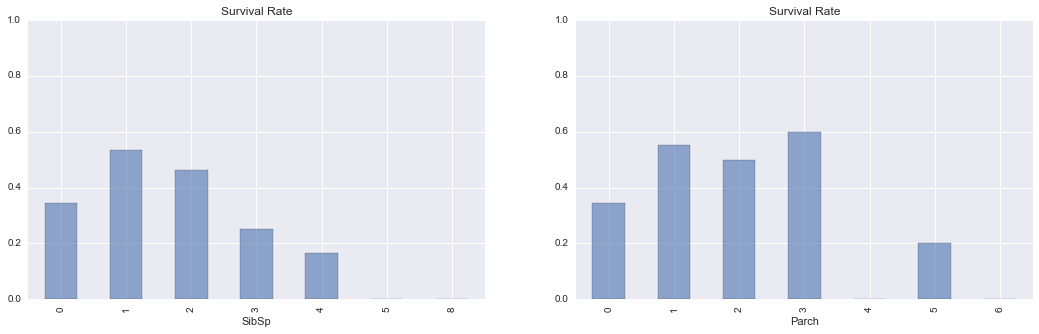

In [112]:
# plot the mean survival rate

fig = plt.figure(figsize = (18,5))

plt.subplot2grid((1,2), (0,0))
df_train.groupby("SibSp")["Survived"].mean().plot(kind = "bar",
                                                 title = "Survival Rate", 
                                                 alpha = 0.6,
                                                 ylim = [0,1])

plt.subplot2grid((1,2), (0,1))
df_train.groupby("Parch")["Survived"].mean().plot(kind = "bar",
                                                 title = "Survival Rate",
                                                 alpha = 0.6,
                                                 ylim = [0,1])

In [113]:
df_train.groupby("Parch", as_index = False).describe()["Survived"]
df_train.groupby("SibSp", as_index = False).describe()["Survived"]

C:\Users\IThomas\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


0  count    608.000000
   mean       0.345395
   std        0.475888
   min        0.000000
   25%        0.000000
   50%        0.000000
   75%        1.000000
   max        1.000000
1  count    209.000000
   mean       0.535885
   std        0.499908
   min        0.000000
   25%        0.000000
   50%        1.000000
   75%        1.000000
   max        1.000000
2  count     28.000000
   mean       0.464286
   std        0.507875
   min        0.000000
   25%        0.000000
   50%        0.000000
   75%        1.000000
   max        1.000000
3  count     16.000000
   mean       0.250000
   std        0.447214
   min        0.000000
   25%        0.000000
   50%        0.000000
   75%        0.250000
   max        1.000000
4  count     18.000000
   mean       0.166667
   std        0.383482
   min        0.000000
   25%        0.000000
   50%        0.000000
   75%        0.000000
   max        1.000000
5  count      5.000000
   mean       0.000000
   std        0.000000
   min     

Observations
- The plots above suggest that SibSp (The number of Siblings and Spouses for a given passenger) and Parch (The number of Parents and Children for a given passenger) have a strong effect on the survival rate.
- Data for passengers with Parch or SibSp > 2 is unreliable as there are very few samples, but there is a clear correlation and this makes the data worth keeping for the machine learning algorithm. 

The last variable I will explore is the embarkation point. I would be suprised if this has an effect but will investigate it for completeness.

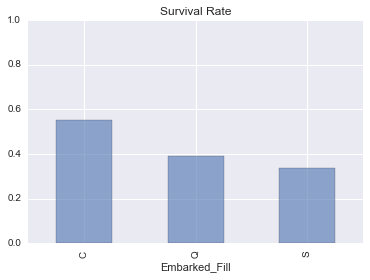

In [115]:
df_train.groupby("Embarked_Fill")["Survived"].mean().plot(kind = "bar",
                                                     title = "Survival Rate",
                                                     alpha = 0.6,
                                                     ylim = [0,1])

Surprisingly, the embarkation point had an effect on the survival rate. This could be a source for further investigation. 

### Supervised Machine Learning 

Let's apply supervised machine learning techniques to the dataset and see how accurately we can predict which passengers survived the shipwreck.

#### Prepare data for Machine Learning

In [116]:
# Some Machine learning algorithms don't work on strings. 

# First identify which columns are non-numeric
df_train.dtypes[df_train.dtypes.map(lambda x: x == "object")]

# Want to keep Sex and Embarked_Fill variables.
# Transform variables into numeric data values

df_train["Sex"] = df_train["Sex"].map({'female': 0, 'male': 1}).astype(int)
df_train["Embarked_Fill"] = df_train["Embarked_Fill"].map({'C': 0, 'Q': 1, 'S': 2}).astype(int)

df_test["Sex"] = df_test["Sex"].map({'female': 0, 'male': 1}).astype(int)
df_test["Embarked"] = df_test["Embarked"].map({'C': 0, 'Q': 1, 'S': 2}).astype(int)

In [117]:
# Next drop columns that are no longer needed.

# drop name and use age_fill instead
df_train = df_train.drop(["Name", "Age", "Ticket", "Embarked", "Fare", "PassengerId"], axis = 1) 

# do same for test dataset but first collect the test data's PassengerIds
test_ids = df_test["PassengerId"].values 
df_test = df_test.drop(["Name", "Age", "Ticket", "Fare", "Fare_Fill", "PassengerId"], axis = 1) 


In [118]:
# Convert from Pandas to NumPy
train_data = df_train.values
test_data = df_test.values

X_train = train_data[0:,1:]
y_train = train_data[0:,0]
X_test = test_data

I will first apply logistic regression. This is an appropriate classifier as the label we would like to predict is binary; whether a passenger is dead or alive. Logistic regression models the probability that a given sample belongs to a particular category by fitting a logistic function to the training data and choosing a cut-off point (decision boundary) to maximise the accuracy of the classifier on the training data.

In [119]:
# initialise clf and run with default values
log_reg = LogisticRegression(random_state = 42)
log_reg = log_reg.fit(X_train, y_train)

# score algorithm on training data
print "Accuracy Score for the Logistic Regression Classifier"
log_reg.score(X_train, y_train)

Accuracy Score for the Logistic Regression Classifier


0.8125701459034792

Not many parameters to tune for LogReg (apart from the regularization parameter, C) so move on to a Random Forest Classifier

In [120]:
from sklearn.ensemble import RandomForestClassifier

tree = RandomForestClassifier(random_state = 42)
tree = tree.fit(X_train, y_train)

print "The mean accuracy for the Random Forest Classifier"
print tree.score(X_train, y_train)

The mean accuracy for the Random Forest Classifier
0.931537598204


Now tune the algorithm. 
- As the dataset is small, I will not create a separate validation dataset. 
- Use StratifiedKFold as the dataset is imbalanced

In [128]:
# use grid search to find the optimal parameters

#create a dictionary with all the parameters we want to search through
param_grid = {"max_features": ["auto", "sqrt"],
              'min_samples_leaf': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
             }

#create a StratifiedKFold object
from sklearn.cross_validation import StratifiedKFold
cross_validator = StratifiedKFold(y = y_train, random_state = 42)

# create a gridsearchobject using the param_grid
from sklearn import grid_search
grid_search_object = grid_search.GridSearchCV(estimator = RandomForestClassifier(random_state = 42),
                                              param_grid = param_grid,
                                              cv = cross_validator)

# fit to the data
grid_search_object.fit(X_train, y_train)

# print out the best parameters
print "Best Parameters obtained for Optimised Random Forest Classifier"
print grid_search_object.best_params_

# return the best estimator
tree_opt = grid_search_object.best_estimator_

# check scores against default Random Forest classifier
print "Accuracy Score for the Random Forest Classifier"
print tree.score(X_train, y_train)

print "\nAccuracy score for best estimator from grid search"
print tree_opt.score(X_train, y_train)

Best Parameters obtained for Optimised Random Forest Classifier
{'max_features': 'auto', 'min_samples_leaf': 9}
Accuracy Score for the Random Forest Classifier
0.931537598204

Accuracy score for best estimator from grid search
0.842873176207


I think that the data above points to overfitting in the default random forest classifier. The default min_samples_leaf value used in the un-optimised RFC is 1, whereas the optimised RFC uses min_samples_leaf = 13, yielding a lower accuracy score.

I will output the predictions of both random forest and the logistic regression classifiers to csv files to see the accuracy score on the kaggle test data. 

In [125]:
y_pred = log_reg.predict(X_test).astype(int)

# output prediction to csv for submission to Kaggle
log_reg_pred = open("LogisticRegressionPred.csv", "wb")
open_file_object = csv.writer(log_reg_pred)
open_file_object.writerow(["PassengerId","Survived"])
open_file_object.writerows(zip(test_ids, y_pred))
log_reg_pred.close()

Public Kaggle score of 0.76555. 

In [126]:
y_pred = tree.predict(X_test).astype(int)

# output prediction to csv for submission to Kaggle
tree_pred = open("RandomForestClassifierPred.csv", "wb")
open_file_object = csv.writer(tree_pred)
open_file_object.writerow(["PassengerId","Survived"])
open_file_object.writerows(zip(test_ids, y_pred))
tree_pred.close()

Public Kaggle score of 0.75598. 

In [127]:
y_pred = tree_opt.predict(X_test).astype(int)

# output prediction to csv for submission to Kaggle
tree_opt_pred = open("RandomForestClassifierOptPred.csv", "wb")
open_file_object = csv.writer(tree_opt_pred)
open_file_object.writerow(["PassengerId","Survived"])
open_file_object.writerows(zip(test_ids, y_pred))
tree_opt_pred.close()

Public Kaggle score of 0.78469. 

Despite scoring worse on the training data, the optimised RFC scored best on the test dataset. 

### Conclusions

- The titanic dataset was investigated, and supervised machine learning techniques were used to predict which passengers would survive. 
- As a first project, I am pleased with the results.
- Future work might involve:
    - more feature engineering
    - a more thorough investigation of what factors correlate with the age data in order to make a more informed substitution for missing values.
    - a look at which features have the most predictive power
    - application of PCA for feature reduction
    - trialling a wider selection of classifiers